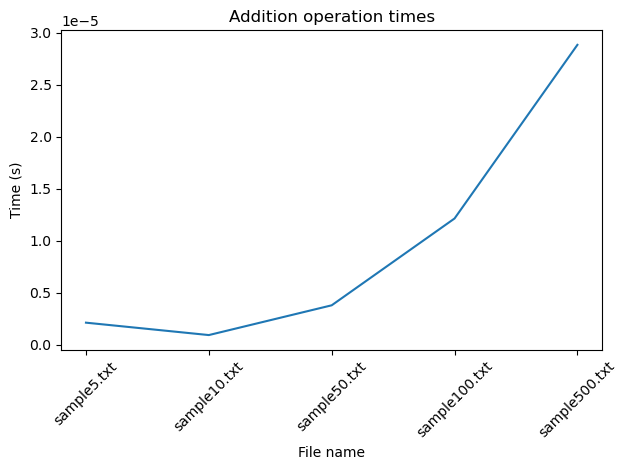

In [9]:
import time
import matplotlib.pyplot as plt
from spreadsheet.arraySpreadsheet import ArraySpreadsheet

from spreadsheet.cell import Cell
files = ['sample5.txt','sample10.txt','sample50.txt','sample100.txt','sample500.txt']
times = []
for file in files:

    spreadsheet = ArraySpreadsheet()
    with open(file, 'r') as f:
        cellsFromFiles = []
        for line in f:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            cellsFromFiles.append(currCell)
        f.close()
        # construct the spreadsheet from the read in data
        spreadsheet.buildSpreadsheet(cellsFromFiles)


        start = time.time()
        spreadsheet.appendRow()
        end = time.time()
        elapsed_time = end - start
        times.append(elapsed_time)

plt.plot(files, times)
plt.title("Addition operation times")
plt.xlabel("File name")
plt.ylabel("Time (s)")
# 调整标签旋转角度
plt.xticks(rotation=45)
# 自动调整子图布局
plt.tight_layout()
plt.show()
